<a href="https://colab.research.google.com/github/joaomarcelofc/datascience/blob/main/Analisando_os_Dados_do_Airbnb_Atenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Atenas

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Atenas, capital da Grécia, berço da civilização e filosofia, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Atenas" widh="20%" src="https://s1.static.brasilescola.uol.com.br/be/2020/07/atenas.jpg"></center>

## Obtenção dos Dados

Todos dados utilizados neste *notebook* foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial será baixado apenas o seguinte arquivo:

* `listings_Athens.csv` - *Summary information and metrics for listings in Athens (good for visualization - Date Compiled 24 March, 2022*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/greece/attica/athens/2022-03-24/visualisations/listings.csv) utilizado neste notebook não esteja mais disponível, o que quebraria o nosso código.

Pensando nisso, disponibilizamos [aqui](https://www.dropbox.com/s/q18dzfmho4o1lik/listings_Athens.csv?dl=1) o conjunto que utilizamos, para que você sempre consiga utilizar este material.
Com isso em mente, vamos ao projeto.

Antes de iniciarmos nosso trabalho, primeiramente iremos importar os pacotes necessários para processar e analisar os dados. Para este projeto, iremos utilizar os pacotes pandas, matplotlib, seaborn e missingno.

In [ ]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

In [ ]:
# importando o arquivo listings_Athens.csv para um DataFrame
df = pd.read_csv("https://www.dropbox.com/s/q18dzfmho4o1lik/listings_Athens.csv?dl=1")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - o preço para alugar um imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews nos últimos 12 meses.
* `license` - número da licença, conforme exigido por lei

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.


In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,76,1,32,2021-09-24,0.24,6,222,7,00000957568
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,50,1,59,2022-02-17,0.51,6,246,15,00001070920
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,45,1,79,2022-03-14,0.68,6,215,21,00000957080
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,48,1,28,2022-03-10,0.20,6,265,5,00000957422
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,69,1,17,2020-01-08,0.15,6,54,0,00000957579


As análises feitas serão documentadas em questionários.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui, analisando também o tipo de cada coluna. Lembrando que este *dataset* que estamos utilizando é a versão resumida do Airbnb.

In [ ]:
# identificar o volume de dados do DataFrame
print(f'Entradas:\t{df.shape[0]}')
print(f'Variáveis:\t{df.shape[1]}\n')

# verificando o tipo dos dados do DataFrame
print(df.dtypes)


Entradas:	10263
Variáveis:	18

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


Conforme documentado acima, nosso *dataset* apresenta um total de 10263 entradas e 18 variáveis, dos tipos int, float e str.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A falta de dados é provavelmente um dos problemas mais comuns ao trabalhar com conjuntos de dados reais. Os dados podem estar ausentes por vários motivos incluindo falha do sensor, gerenciamento inadequado de dados e até mesmo erro humano. O mais importante é analisar o impacto destes dados ausentes nas análises que estão sendo feitas e o quanto são significativos em comparação ao total de dados do *dataset*.

Para analisar esses dados ausentes, e verificar a distribuição deles no conjunto todo de uma forma mais visual, podemos utilizar a biblioteca 
Missingno. Se trata de uma biblioteca simples de usar que fornece uma série de visualizações para entender a presença e distribuição de dados ausentes em um dataframe de pandas. Isso pode ser na forma de um gráfico de barras, gráfico de matriz, mapa de calor ou um dendrograma. 

**Importante!** Embora seja uma boa ferramenta, que permite uma melhor visualização dos dados, é sempre recomendado que também seja feita uma análise quantitativa, principalmente para verificar as variáveis que apresentam poucos dados ausentes que podem até não gerar visualização na matriz do Missingno.



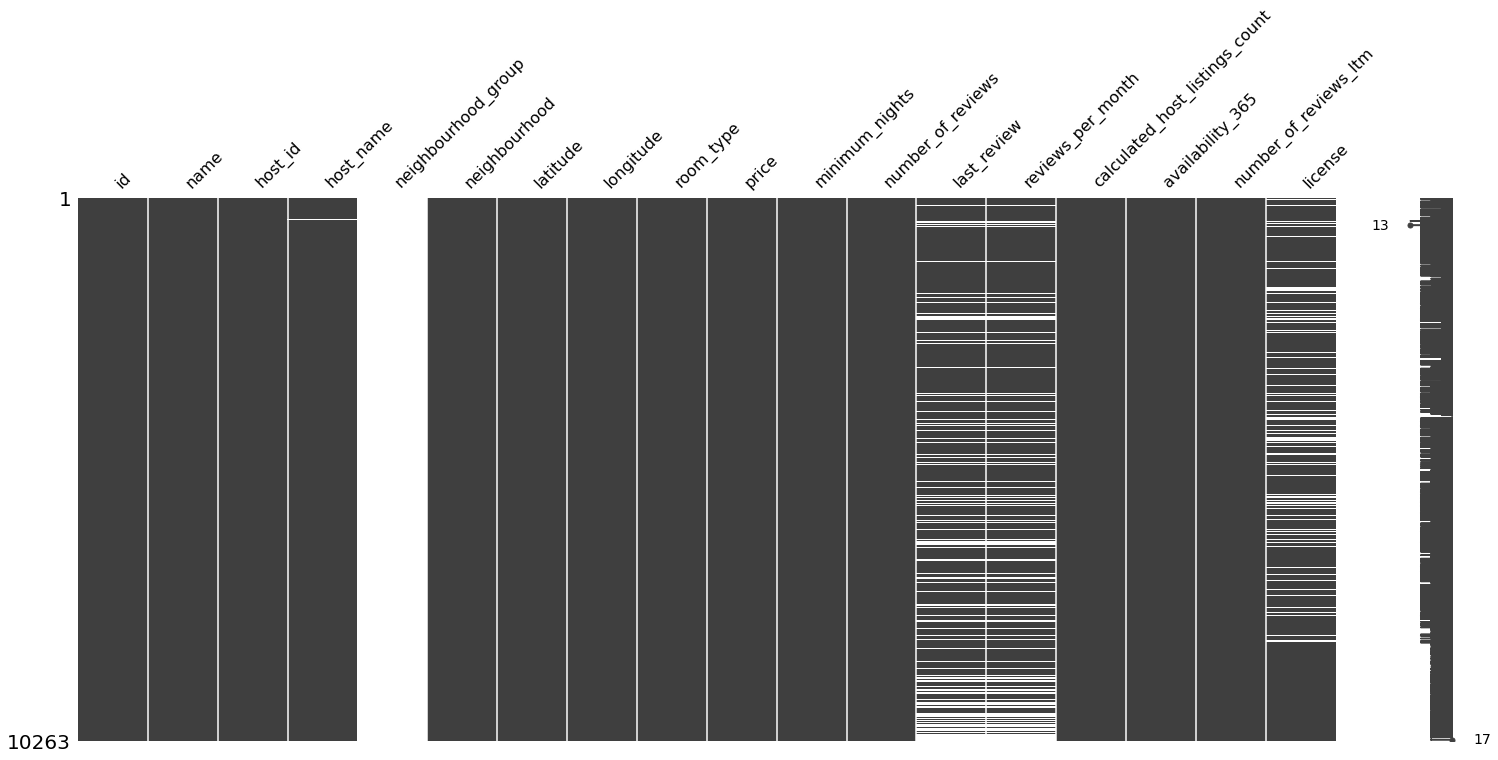

In [ ]:
# utilizando a biblioteca Missingno, que já foi importada acima, para analisar a distribuição dos dados ausentes
msno.matrix(df);

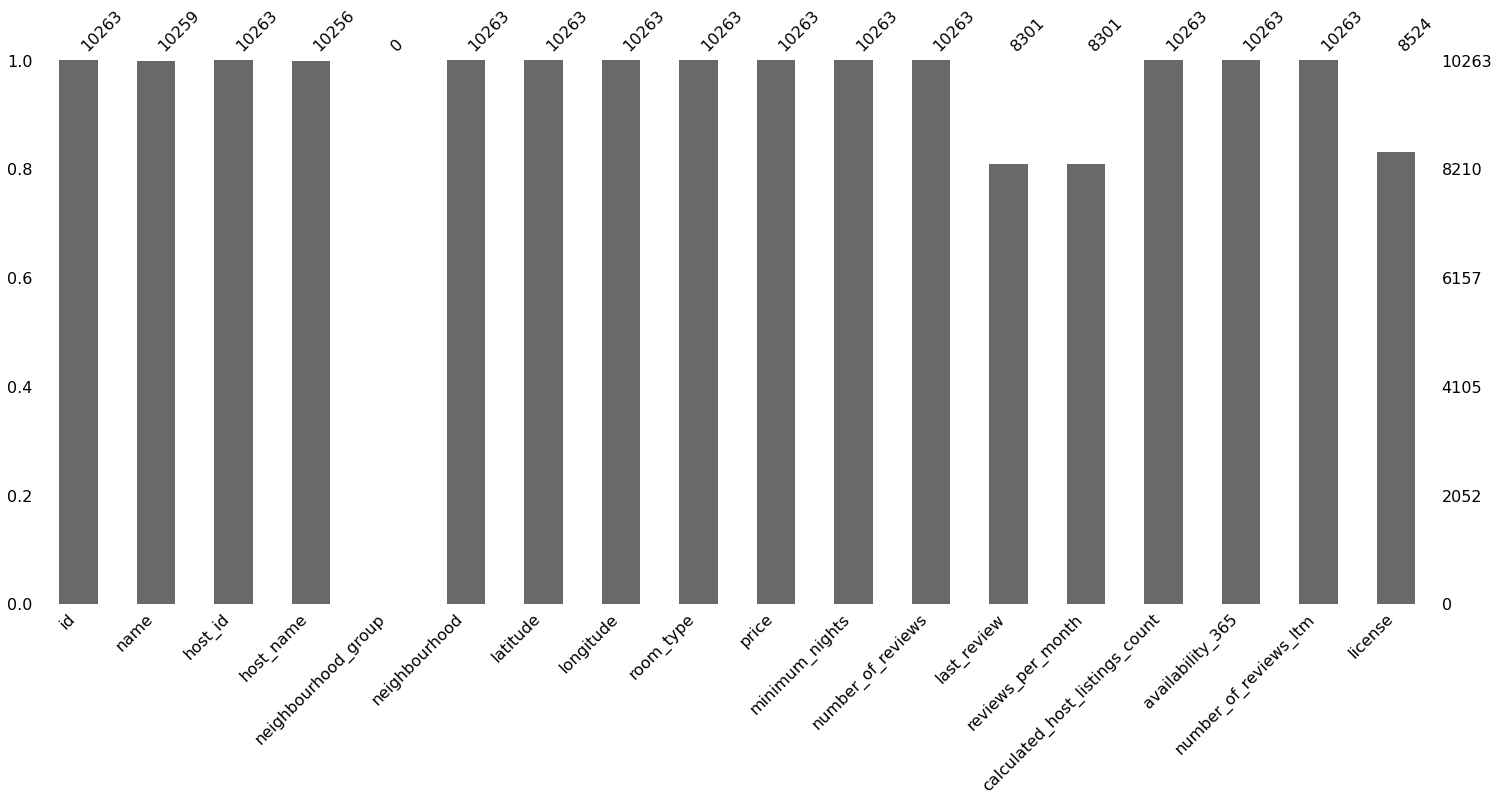

In [ ]:
# utilizando a biblioteca Missingno, que já foi importada acima, para analisar a quantidade dos dados ausentes
msno.bar(df);

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.191172
last_review                       0.191172
license                           0.169444
host_name                         0.000682
name                              0.000390
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Utilizando o gráfico de matriz, e as análises quantitativas dos daos,conforme documentado abaixo, podemos verificar as seguintes observações em nosso *dataset*:

* É possível ver que a coluna `neighbourhood_group` não possui nenhum dado registrado.
* A quantidade de valores nulos na variável `host_name` representa menos de 0,1% e não influencia em nossa análise.
* Embora não seja visível na matriz do Missingno, pela baixíssima representatividade, a variável `name` apresenta apenas 4 valores nulos, não influenciando em nossa análise.
* As variáveis `last_review` e `reviews_per_month` possuem cerca de 20% dos valores nulos, cada uma, igualmente distribuídos no *dataset*.
* A variável `license` também possui alguns valores nulos, cerca de 17%, mas que não estão concentrados em determinados pontos do *dataset*.

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis de uma forma mais visual, plotaremos histogramas para cada uma delas.

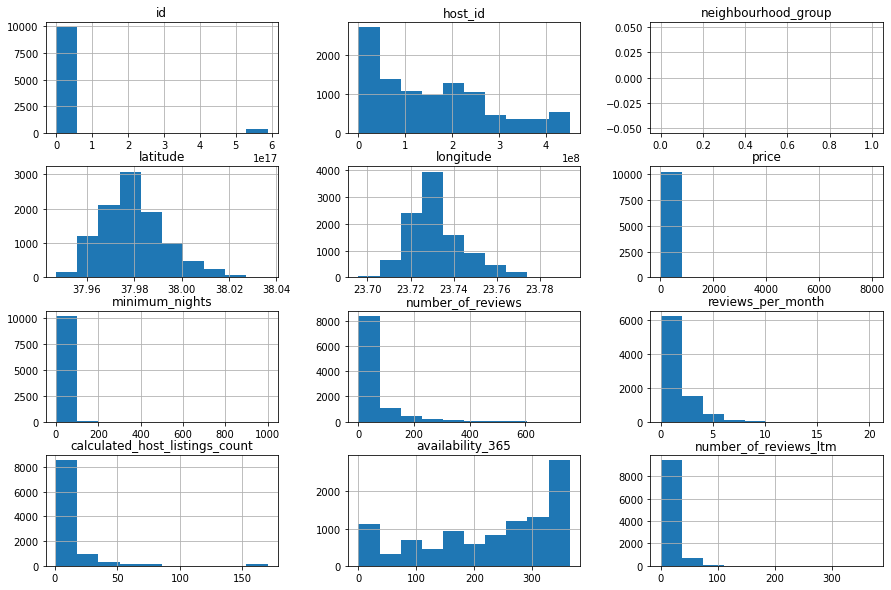

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights`, `number_of_reviews` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

####Resumo estatístico

Através do método describe() é possível verificar o resumo estatístico das variáveis numéricas. O resumo traz as principais informações estatísticas (*count, mean, std, min, max, 25%, 50% e 75%*)

In [ ]:
# verificando o resumo estatístico das variáveis
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,10263.000000,10263.000000,10263.000000,8301.000000,10263.000000,10263.000000
mean,82.162136,3.462243,42.189223,1.439888,11.425412,228.448992
std,286.820772,22.348372,71.505430,1.529144,24.824087,118.479960
min,7.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,37.000000,1.000000,1.000000,0.320000,1.000000,144.000000
50%,50.000000,2.000000,12.000000,0.940000,3.000000,263.000000
75%,80.000000,2.000000,51.000000,2.040000,10.000000,334.000000
max,8000.000000,1000.000000,760.000000,20.250000,170.000000,365.000000


Pelo resumo estatístico acima, podemos verificar as seguintes observações:

* A variável `price` possui uma média de 82 euros, sendo que ela possui 75% dos seus valores até 80 euros. No entanto existe um valor máximo de 8.000 euros, o que representa um *outlier* no *dataset* 

* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

*  A média de número de reviews é de 42, mas o local com mais representatividade teve 760 reviews.

#### Boxplot para price

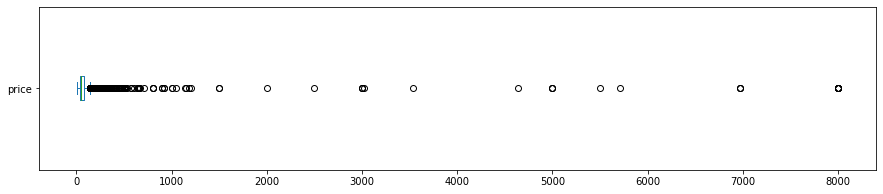


price: valores acima de 500
52 entradas
0.5067%


In [ ]:
# boxplot para price
df.price.plot.box(vert=False, figsize=(15,3))
plt.show()

# verificando valores acima de 500
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))


In [ ]:
df_outliers = df.loc[df["price"] > 500]
df_outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
70,641721,Beach Summer House,3206172,Takis,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97807,23.73326,Entire home/apt,600,7,0,NaN,NaN,1,365,0,NaN
172,1905550,the chamber,9891088,Lambros,NaN,ΠΕΤΡΑΛΩΝΑ,37.96147,23.70720,Entire home/apt,916,3,207,2017-12-03,2.07,2,90,0,NaN
237,3314818,"New,big apt 10min toSepolia metro",13406254,John,NaN,ΣΕΠΟΛΙΑ,38.00628,23.72081,Private room,1050,12,0,NaN,NaN,1,365,0,NaN
912,13199776,Cool apartment in Downtown Athens,26661656,Ioannis,NaN,ΚΕΡΑΜΕΙΚΟΣ,37.98247,23.71434,Entire home/apt,1000,1,35,2017-09-01,0.49,1,0,0,NaN
922,13304153,The White House Plaka Mansion by JJ Hospitality,55670751,Jj,NaN,ΑΚΡΟΠΟΛΗ,37.97148,23.73002,Entire home/apt,575,1,75,2022-01-23,1.21,13,268,12,0206K92000316401


####Análise dos *Outliers*

Abaixo incluímos uma análise dos *outliers* de nosso dataset. Entendemos que, estes valores, embora distorçam nossa análise, devem ser verificados separadamente, pois apresentam informações igualmente importantes. Apresentamos abaixo duas análises:

* Análise do preço médio dos valores mais caros, acima de 500 euros, agrupada por região.

* Análise dos maiores valores apresentados, também agrupados por região.

In [ ]:
# Analise da média dos mais caros
df_outliers.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]

neighbourhood
ΠΕΔΙΟ ΑΡΕΩΣ               5706.000000
ΝΕΟΣ ΚΟΣΜΟΣ               5250.000000
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ    4555.764706
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ          3533.000000
ΣΤΑΔΙΟ                    3150.000000
Name: price, dtype: float64

Conforme documentado acima, ao analisarmos os outliers, verificamos que a média dos valores mais caros está localizada, principalmente, nas regiões do Pedion tou Areos (ΠΕΔΙΟ ΑΡΕΩΣ), um dos maiores parques públicos de Atenas e Neos Kosmos (ΝΕΟΣ ΚΟΣΜΟΣ), regiões localizadas próximas da Acrópole principal ponto turístico de Atenas. Também temos a região da Plaka (ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ), que é um dos bairros centrais mais conhecidos da cidade e um dos mais transitados pelos turistas.

No entanto essa análise pode não ser muito conclusiva, pois estes valores estão muito acima da média, que é 80 euros, sendo que o maior chega até a 8.000 euros por noite. Entendemos que, além da região, outros fatores podem influenciar  esses valores mais representativos. Por entender que eles destoam dos demais dados, e podem influenciar nosso resultado, iremos descartar esses dados nas próximas análises.

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis , vamos agora limpar o *DataFrame* e plotar novamente o histograma. Para fins de análise, iremos limpar apenas os *outliers* encontrados na variável `price`, em um primeiro momento. Isto pois as variáveis `minimum_nights` e `number_of_reviews`, embora apresentem valores distoantes do restante dos dados, apresentam informações importantes no conjunto como um todo, que julgamos importante não descartar. Os dados nulos da variável `minimum_nights` serão desconsiderados apenas quando analisarmos a média do mínimo de noites para aluguel.

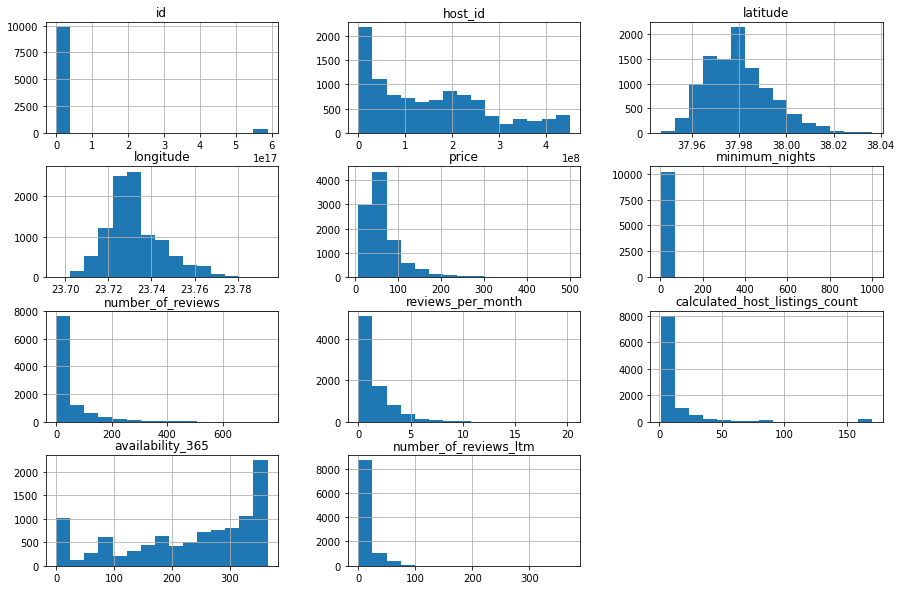

In [ ]:
# remover outliers em um novo Data Frame
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

Uma vez eliminados os valores de *outliers* na variável `price` verificamos abaixo a média dos preços, agrupados por bairros, através do `groupby`.

In [ ]:
# ver a média da coluna `price`
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5])

print('\nValor da média total dos preços, após a remoção dos outliers: {:.2f}'.format(df_clean.price.mean()))


neighbourhood
ΖΑΠΠΕΙΟ                   99.985294
ΚΟΛΩΝΑΚΙ                  95.734940
ΚΕΡΑΜΕΙΚΟΣ                89.172932
ΑΚΡΟΠΟΛΗ                  89.057402
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ    84.465285
Name: price, dtype: float64

Valor da média total dos preços, após a remoção dos outliers: 67.64


Eliminando os *outliers*, percebemos que as regiões com maior preço médio são as regiões de Zappio (ΖΑΠΠΕΙΟ), perto da Acrópole e onde está localizado o templo de Zeus e Kolonaki (ΚΟΛΩΝΑΚΙ), região sofisticada e centro de compras de luxo onde marcas internacionais e lojas de grifes gregas. Outra região com valor mais alto é Keramikos (ΚΕΡΑΜΕΙΚΟΣ), tendo o seu preço possivelmente influenciado por estar em uma região que abriga um dos hotéis mais luxuosos de Atenas,  o Athenaeum Eridanus Luxury Hotel (hotel de luxo). Outra região com valores acima da média é a própria região da Acrópole (ΑΚΡΟΠΟΛΗ) e Plaka (ΠΛΑΚΑ).

Todos os preços médios dessas regiões estão acima do preço médio total do *dataset*, desconsiderando os *outliers*, que é 67.64 euros.

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. Em nossa análise, estamos verificando relação ou semelhança entre duas variáveis.

O coeficiente de correlação tem a função de estabelecer qual intensidade dessa relação. Para identificar as correlações existentes entre essas variáveis de interesse, vamos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.028688,-0.096958,-0.090360,0.008813,0.101229
minimum_nights,0.028688,1.000000,-0.020524,-0.045746,-0.020399,-0.002701
number_of_reviews,-0.096958,-0.020524,1.000000,0.740797,-0.020025,-0.037843
reviews_per_month,-0.090360,-0.045746,0.740797,1.000000,0.056892,0.052761
calculated_host_listings_count,0.008813,-0.020399,-0.020025,0.056892,1.000000,0.049310
availability_365,0.101229,-0.002701,-0.037843,0.052761,0.049310,1.000000


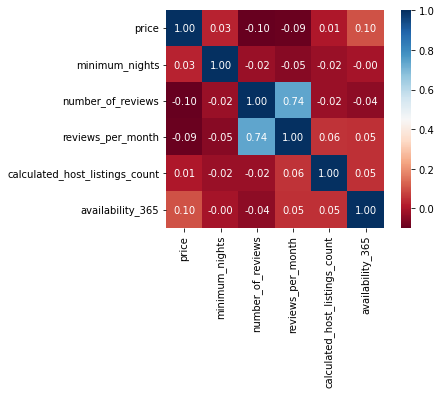

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Verificamos acima que o nível de correlação entre as variáveis, é praticamente nulo, em sua maioria.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Existem opções de locação de apartamentos, casas inteiras, quarto individual e também quartos que podem ser compartilhados com outras pessoas.

Iremos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

Entire home/apt    8991
Private room        989
Hotel room          136
Shared room          95
Name: room_type, dtype: int64


Entire home/apt    0.880521
Private room       0.096856
Hotel room         0.013319
Shared room        0.009304
Name: room_type, dtype: float64


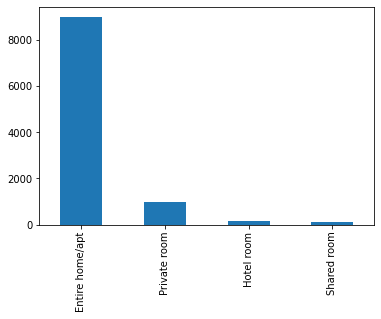

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(df_clean.room_type.value_counts())
print('\n')
print(df_clean.room_type.value_counts() / df_clean.shape[0])

df_clean.room_type.value_counts().plot.bar();

In [ ]:
# mostrar o valor médio por tipo de imóvel
df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)


room_type
Hotel room         126.742647
Shared room         74.094737
Entire home/apt     67.006562
Private room        64.684530
Name: price, dtype: float64

Através da análise acima, verificamos que o tipo de locação do airbnb em Atenas com mais disponibilidade são as opções de locação de quarto e apartamento inteiro, representando 88% do total. Quarto privativo representa 9% das disponibilidades, e quarto de hotel e quarto compartilhado representam juntos pouco mais de 2%.

Ao analisarmos a média de preço por tipo de locação, verificamos que os quartos de hotel apresentam os maiores valores, com uma média de 126 euros. Os demais tipos apresentam, juntos, uma média de aproximadamente 68 euros, aproximadamente metade do valor médio dos quartos de hotel. 

### **Q8.Qual o ranking por hosts?**

In [ ]:
# ranking por hosts
df_clean.host_name.value_counts().sort_values(ascending=False)[:10]


George          231
Maria           175
Homm ®          170
Dimitris        164
Konstantinos    139
Nikos            95
Ioannis          87
Mint             84
Katerina         80
Upstreet         76
Name: host_name, dtype: int64

In [ ]:
df_clean.groupby(['host_name']).number_of_reviews_ltm.sum().sort_values(ascending=False)[:10]

host_name
Homm ®          3009
Evan&Anetta     2337
George          2200
Konstantinos    1793
Maria           1566
Ioannis         1522
Alexandros      1446
Sokol           1328
Dimitris        1213
Toni            1122
Name: number_of_reviews_ltm, dtype: int64

Ao analisarmos o ranking por hosts, verificamos que George e Homm ® apresentam o maior número de locações disponíveis e possuem também as locações com maior número de reviews.

### **Q9.Qual influência do preço na posição geográfica**





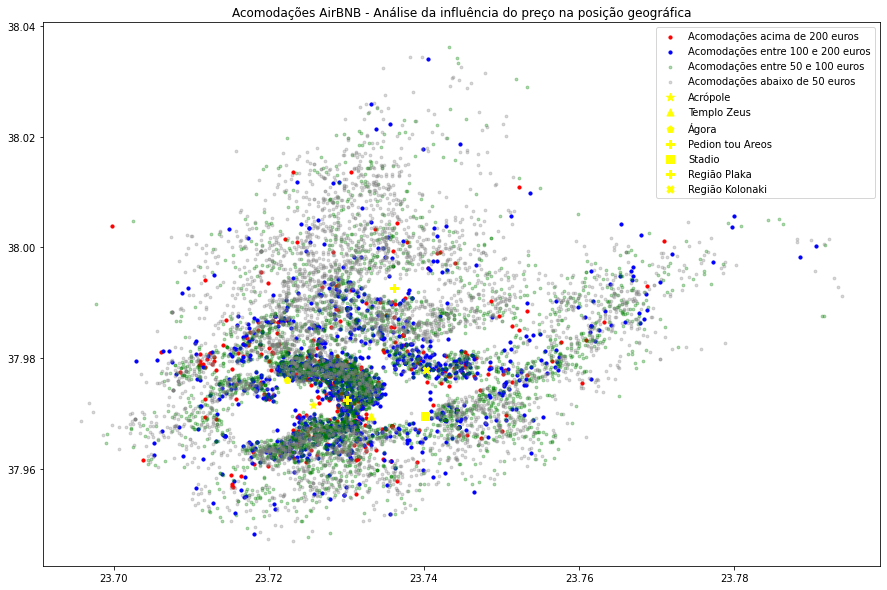

In [ ]:
# abaixo incluímos no scatter plot as locações do nosso dataset, desconsiderando os outliers
# incluímos também os principais pontos e regiões de atenas, incluindo sua localização (latitude, e longitude),obtidos através do Google Maps

plt.subplots(figsize=(15,10))
plt.scatter(df_clean[df_clean.price>=200].longitude,df_clean[df_clean.price>=200].latitude, s=10, c='red',label='Acomodações acima de 200 euros')
plt.scatter(df_clean[(df_clean.price<200)&(df_clean.price>=100)].longitude,df_clean[(df_clean.price<200)&(df_clean.price>=100)].latitude, s=10, c='blue', label='Acomodações entre 100 e 200 euros')
plt.scatter(df_clean[(df_clean.price<100)&(df_clean.price>=50)].longitude,df_clean[(df_clean.price<100)&(df_clean.price>=50)].latitude, s=8, c='green', alpha=0.3, label='Acomodações entre 50 e 100 euros')
plt.scatter(df_clean[(df_clean.price<50)&(df_clean.price>=0)].longitude,df_clean[(df_clean.price<50)&(df_clean.price>=0)].latitude, s=8, c='gray', alpha=0.3, label='Acomodações abaixo de 50 euros')
plt.scatter([23.72573], [37.97161], s=70, c='yellow', marker='*', label='Acrópole')#Acrópole
plt.scatter([23.73311], [37.96946], s=50, c='yellow', marker='^', label='Templo Zeus')#TemploZeus
plt.scatter([23.72237], [37.97605], s=50, c='yellow', marker='p', label='Ágora')#Ágora
plt.scatter([23.73613], [37.99274], s=50, c='yellow', marker='P', label='Pedion tou Areos')#Pedion tou Areos
plt.scatter([23.74010], [37.96955], s=50, c='yellow', marker='s', label='Stadio')#Stadio de Atenas
plt.scatter([23.73014], [37.97242], s=50, c='yellow', marker='P', label='Região Plaka')#BairroPlaka
plt.scatter([23.74025], [37.97784], s=50, c='yellow', marker='X', label='Região Kolonaki')#Kolonaki
plt.title("Acomodações AirBNB - Análise da influência do preço na posição geográfica")
plt.legend();

* Há uma concentração maior de acomodações com valor médio entre 100 e 500 euros perto dos principais pontos da cidade. Isso faz sentido, pois essa é uma região turística, próxima da Acrópole e de outras regiões antigas, como o Templo de Zeus e a Ágora. Além disso tabém está próximo das regiões de Plaka, um dos bairros centrais mais conhecidos da cidade, e a região de Kolonaki, uma das mais sofisticadas de Atenas.

* No entanto, podemos notar que o número de acomodações abaixo de 100 euros também é grande nessas mesmas regiões, pois apresentam mais representidavidade do total disponível para locação.

* Nas regiões mais afastadas do centro de Atenas, a predominância é de locações abaixo de 50 euros. 

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Notamos que maioria dos locais com preço entre 100 e 500 euros, preços mais elevados, estão situados próximos a pontos importantes da cidade. Portanto, embora o número de locações abaixo de 100 euros também seja bastante elevado nessas mesmas regiões, esses dados sugerem que o preço é influenciado pela posição geográfica. Evidentemente outros critérios são considerados, como tipo da locação, e luxo do local, mas o a posição é um fator importante que justifica esses preços.

Também notamos que nas regiões mais afastados dos principais pontos de Atenas a predominância é de locações abaixo de 50 euros.

O tipo de locação com maior valor médio apresentado são quartos de hotel, com média de 126 euros, praticamente o dobro do valor dos demais tipos de locação.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.